# Spike Sorting with SpikeInterface

## 1 Preparation

Import the modules required for this notebook

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface.full as si
import probeinterface as pi
from probeinterface.plotting import plot_probe

%matplotlib inline

Download the Data required for this notebook

In [2]:
import os
import requests
import zipfile

url = "https://uni-bonn.sciebo.de/s/x2mNZ3pm3hAHKQa/download"
response = requests.get(url)
print("Downloading Data ...")
with open("openephys_recording.zip", "wb") as file:
    file.write(response.content)

with zipfile.ZipFile("openephys_recording.zip", "r") as zip_ref:
    zip_ref.extractall("")
os.remove("openephys_recording.zip")
print("Done!")

## 2 Working with Recordings

SpikeInterface provides a unified interface for reading, handling, and
processing extracellular electrophysiological recordings from a wide
variety of file formats. In this section, you will learn how to load
recordings, inspect their properties, and extract data segments for
further analysis. This is the first step in any spike sorting workflow,
as it allows you to access and manipulate the raw voltage traces
recorded from your experiment.

| Code | Description |
|------------------------------------|------------------------------------|
| `rec = si.read_openephys(data_dir, stream_id="1")` | Read a specific stream from the Open Ephys recording in `data_dir`. |
| `rec.get_num_channels()` | Get the number of channels in the recording `rec`. |
| `rec.get_duration()` | Get the total duration (in seconds) of the recording `rec`. |
| `rec.get_sampling_frequency()` | Get the sampling frequency (in Hz) of the recording `rec`. |
| `rec.get_traces(start_frame=i, stop_frame=j)` | Get a NumPy array containing the data recorded between samples `i` and `j`. |
| `rec.frame_slice(start_frame, end_frame)` | Get a segment of the recording between the specified frames. |
| `plt.plot(traces[:, :n])` | Plot the traces for the first `n` channels. |

------------------------------------------------------------------------

Run the cell below to define the data directory

In [3]:
data_dir = "openephys_raw/2023-08-23_15-56-05"

<span class="theorem-title">**Example 1**</span> Load the recording
stream with the id `"1"`, which contains the auxiliary channels, assign
the returned `RecordingExtractor` to a variable called `aux_rec` and
print it.

In [4]:
rec = si.read_openephys(data_dir, stream_id="1")
rec

OpenEphysBinaryRecordingExtractor: 8 channels - 30.0kHz - 1 segments - 9,000,000 samples - 300.00s (5.00 minutes) - int16 dtype - 137.33 MiB Channel IDs ['ADC1' 'ADC2' 'ADC3' 'ADC4' 'ADC5' 'ADC6' 'ADC7' 'ADC8'] Annotations is_filtered : False experiment_name : experiment1 Properties gain_to_uV [152.58789062 152.58789062 152.58789062 152.58789062 152.58789062
 152.58789062 152.58789062 152.58789062] offset_to_uV [0. 0. 0. 0. 0. 0. 0. 0.] physical_unit ['V' 'V' 'V' 'V' 'V' 'V' 'V' 'V'] gain_to_physical_unit [0.00015259 0.00015259 0.00015259 0.00015259 0.00015259 0.00015259
 0.00015259 0.00015259] offset_to_physical_unit [0. 0. 0. 0. 0. 0. 0. 0.] channel_name ['ADC1' 'ADC2' 'ADC3' 'ADC4' 'ADC5' 'ADC6' 'ADC7' 'ADC8']

<span class="theorem-title">**Exercise 1**</span> Load the stream with
the id `"0"` and assign the returned `RecordingExtractor` to a variable
called `rec`.

​

<span class="theorem-title">**Exercise 2**</span> Get the duration of
the recording

​

<span class="theorem-title">**Exercise 3**</span> Get the sampling
frequency of the recording and assign it to a variable `fs`

​

<span class="theorem-title">**Example 2**</span> Use the `frame_slice`
method to select the first `10` seconds of the recording `rec`. Assign
the returned object to a new variable `seg` and get it’s duration.

In [11]:
seg = rec.frame_slice(start_frame=0 * fs, end_frame=10 * fs)
seg.get_duration()

10.000000000000027

<span class="theorem-title">**Exercise 4**</span> Use the `frame_slice`
method to select the segment between `0.5` and `0.7` seconds. Assign the
returned object to a new variable `seg` and get it’s duration.

​

<span class="theorem-title">**Exercise 5**</span> Use `seg.get_traces()`
to get the raw voltage traces and assign them to a variable `traces`.

​

<span class="theorem-title">**Example 3**</span> Plot the extracted
`traces` for the first 3 channels

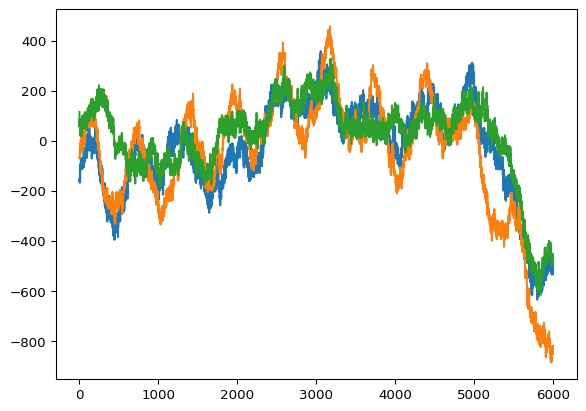

In [16]:
plt.plot(traces[:, :3])

<span class="theorem-title">**Exercise 6**</span> Plot the extracted
`traces` for the last 5 channels

​

## 3 Handling Probe Information

Accurate probe information is essential for interpreting extracellular
recordings, as it defines the spatial arrangement and wiring of the
electrodes. ProbeInterface, integrated with SpikeInterface, allows you
to load, visualize, and configure probe layouts from a wide range of
manufacturers. In this section, you will learn how to select a probe,
visualize its geometry, remap its wiring, and attach it to your
recording for downstream analysis.

| Code | Description |
|------------------------------------|------------------------------------|
| `probe = pi.get_probe("neuropixels", probe="NP2014")` | Get the `"NP2014"` probe from `"neuropixels"` and assign it to `probe`. |
| `probe = pi.get_probe(manufacturer, probe_name)` | Get a probe by specifying the manufacturer and probe name. |
| `pi.get_available_pathways()` | List all available wiring pathways for connecting probes and acquisition systems. |
| `probe.wiring_to_device(pathway)` | Remap the probe’s channels for a given wiring pathway. |
| `plot_probe(probe, ax=ax)` | Plot the probe and its channels using a matplotlib axis `ax`. |
| `plot_probe(probe, ax=ax, with_contact_id=True, with_device_index=True)` | Plot the probe with contact and device indices. |
| `rec.set_probe(probe)` | Add the probe information to the recording object `rec`. |
| `probe = rec.get_probe()` | Retrieve the probe information from a recording object. |
| `fig, ax = plt.subplots()` | Create a new matplotlib figure and axis for plotting. |
| `ax.set(xlim=(a, b), ylim=(c, d))` | Set the x and y axis limits for the plot. |

------------------------------------------------------------------------

<span class="theorem-title">**Example 4**</span> Get the `"NP1010"`
probe from `"neuropixels"`.

In [19]:
manufacturer = "neuropixels"
probe_name = "NP1010"
probe = pi.get_probe(manufacturer, probe_name)
probe

Probe - IMEC - Neuropixels 1.0 - 960ch - 1shanks

<span class="theorem-title">**Example 5**</span> Plot the probe and
adjust the axis limits to display the probe’s tip

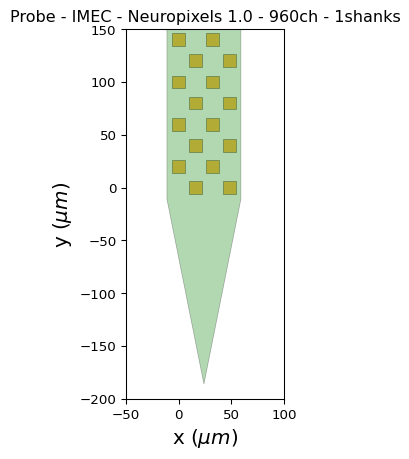

In [20]:
fig, ax = plt.subplots()
plot_probe(probe, ax=ax)
ax.set(xlim=(-50, 100), ylim=(-200, 150))

<span class="theorem-title">**Exercise 7**</span> Get the `"1S256"`
probe from `"plexon"`

​

<span class="theorem-title">**Exercise 8**</span> Plot the probe and
adjust the axis limits to display the probe’s tip

​

<span class="theorem-title">**Exercise 9**</span> Go to the
[ProbeInterface
library](https://github.com/SpikeInterface/probeinterface_library/tree/main)
and select a new manufacturer and probe from there. Then, get the probe
and plot it

​

<span class="theorem-title">**Example 6**</span> Load the
`"ASSY-236-H5"` probe from `"cambridgeneurotech"` and remap the channels
for the `"cambridgeneurotech_mini-amp-64"` wiring pathway. Then, plot
the probe with the contact and device indices and adjust the axis limit
to view the tip of the probe.

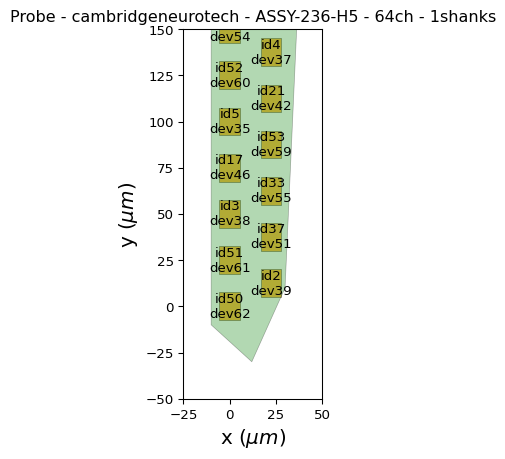

In [27]:
probe = pi.get_probe("cambridgeneurotech", "ASSY-236-H5")
probe.wiring_to_device("cambridgeneurotech_mini-amp-64")

fig, ax = plt.subplots()
plot_probe(probe, ax=ax, with_contact_id=True, with_device_index=True)
ax.set(xlim=(-25, 50), ylim=(-50, 150))

<span class="theorem-title">**Exercise 10**</span> Load the
`"ASSY-236-H5"` probe from `"cambridgeneurotech"` and remap the channels
for the `"ASSY-156>RHD2164"` wiring pathway. Then, plot the probe with
the contact and device indices and adjust the axis limit to view the tip
of the probe.

​

<span class="theorem-title">**Exercise 11**</span> List all of the
available wiring pathways. Select one and apply it to the
`"ASSY-236-H5"` probe from `"cambridgeneurotech"` and plot the probe
(NOTE: not all wiring pathways are compatible with every device).

​

<span class="theorem-title">**Exercise 12**</span> Add the `probe` to
the recording `rec` using `.set_probe()` and then call `.get_probe()`
method to verify the probe info was added to the recording.

​

## 4 Spike Sorting

Spike sorting is the process of detecting and classifying action
potentials (spikes) from extracellular recordings, assigning them to
putative single units (neurons). SpikeInterface provides a unified API
to run a variety of spike sorting algorithms (sorters) and manage their
outputs. In this section, you will learn how to list available sorters,
run a sorter on your data, and inspect the results, including the number
of detected units and their spike trains.

| Code | Description |
|------------------------------------|------------------------------------|
| `si.installed_sorters()` | List all spike sorters installed in the current environment. |
| `si.run_sorter(sorter_name, recording, folder, **kwargs)` | Run a spike sorter on the given recording, saving results to the specified folder. |
| `results.get_num_units()` | Get the number of units detected in the spike sorting results. |
| `results.get_unit_ids()` | Get the list of unit IDs from the sorting results. |
| `results.get_unit_spike_train(unit_id, return_times=True)` | Get the spike train for a specific unit, optionally returning spike times. |
| `rec.frame_slice(start_frame, end_frame)` | Select a segment of the recording for spike sorting. |
| `fs = rec.get_sampling_frequency()` | Get the sampling frequency of the recording. |

------------------------------------------------------------------------

Run the code below to load the recording, and add the probe information
to it.

In [34]:
rec = si.read_openephys(data_dir, stream_id="0")
probe = pi.get_probe("cambridgeneurotech", "ASSY-236-H5")
probe.wiring_to_device("cambridgeneurotech_mini-amp-64")
rec = rec.set_probe(probe)

<span class="theorem-title">**Exercise 13**</span> List all of the
installed spike sorters

​

<span class="theorem-title">**Example 7**</span> Select the first `10`
seconds of the recording `rec` and run the spike sorter `"tridesclous2"`
on the recording segment `seg`.

In [37]:
t_start = 0
t_stop = 10
fs = rec.get_sampling_frequency()
seg = rec.frame_slice(start_frame=t_start * fs, end_frame=t_stop * fs)
sorting_TDC = si.run_sorter(
    sorter_name="tridesclous2",
    recording=seg,
    folder="results_TDC",
    remove_existing_folder=True,
)

/home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/default/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/default/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/default/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/default/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_fini

<span class="theorem-title">**Exercise 14**</span> Get the number of
units in `sorting_TDC`.

​

<span class="theorem-title">**Exercise 15**</span> Get the unit ids in
`sorting_TDC`.

​

<span class="theorem-title">**Exercise 16**</span> Get the spike train
for any of the units.

​

<span class="theorem-title">**Exercise 17**</span> Select the first `10`
seconds of the recording `rec` and run the spike sorter
`"spykingcircus2"` with `apply_motion_correction=False` on the recording
segment `seg`. Then, print the number of identified units.

​

## 5 Setting Sorting Parameters

Many spike sorters offer a range of parameters that can be tuned to
optimize detection and clustering for your specific dataset.
SpikeInterface allows you to query and set these parameters in a
standardized way. In this section, you will learn how to retrieve
default parameters for a sorter, modify detection and filtering
settings, and run sorters with custom configurations to improve sorting
performance.

| Code | Description |
|------------------------------------|------------------------------------|
| `si.get_default_sorter_params(sorter_name)` | Get the default parameters for a given spike sorter. |
| `si.run_sorter(sorter_name, recording, folder, detection=..., filtering=..., **kwargs)` | Run a spike sorter with custom detection or filtering parameters. |
| `detection = {"detect_threshold": value}` | Set the detection threshold parameter for a sorter. |
| `filtering = {"freq_min": fmin, "freq_max": fmax}` | Set the minimum and maximum filter frequencies for a sorter. |
| `svd = {"n_components": 3}` | Set the number of SVD/PCA components to use for feature extraction. |
| `results.get_num_units()` | Get the number of detected units after sorting. |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 18**</span> Get the default
parameters for the spike sorter `"tridesclous2"`

​

<span class="theorem-title">**Example 8**</span> Run the spike sorter
`"tridesclous2"` on the first 10 seconds of the recording `rec` and set
the `detection` parameter to `{"detect_threshold":8}`. Then, print the
number of detected units.

In [48]:
t_start = 0
t_stop = 10
fs = rec.get_sampling_frequency()
seg = rec.frame_slice(start_frame=t_start * fs, end_frame=t_stop * fs)

detection = {"detect_threshold": 8}
sorting_TDC = si.run_sorter(
    sorter_name="tridesclous2",
    recording=seg,
    folder="results_TDC",
    remove_existing_folder=True,
    detection=detection,
)
sorting_TDC.get_num_units()

/home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/default/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/default/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/default/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/default/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_fini

27

<span class="theorem-title">**Exercise 19**</span> Run the spike sorter
`"tridesclous2"` on the first 10 seconds of the recording `rec` and set
the `filtering` parameter to `{"freq_min": 1000, "freq_max":9000}`.
Then, print the number of detected units.

​

<span class="theorem-title">**Exercise 20**</span> Run the spike sorter
`"tridesclous2"` on the segment `seg` with `svd={"n_components":3}`

​